# GRIP: The Sparks Foundation
## Data Science and Business Analytic Intern
### **Author: Mujahid**
## Task 1: Prediction using Supervised ML

**In this task we will predict the percentage of an student based on the no. of study hours.This is a Simple linear Regression Task which involves two variables. The feature is the number of study hours and the target value is the Scores of the student.**


In [23]:
#Importing the required Liberaries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Now we will read our data from the Given URL

In [24]:
url="http://bit.ly/w-data"
St_Data=pd.read_csv(url)

### Exploring our Data

In [25]:
print(St_Data.shape)
St_Data.head()#for top five Rows

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [26]:
St_Data.tail()#for Bottom five rows

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [27]:
St_Data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [28]:
St_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [29]:
St_Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Now we will plot the Graph between the Marks scored by the student with respective to their Number of hours spend by them on Study. From Graph we will Observe if there is any relationship among them**

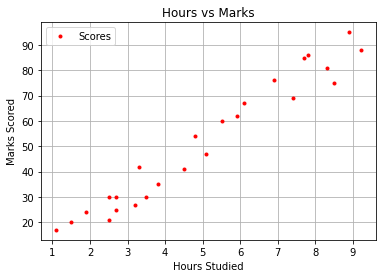

In [30]:
# Plotting the distribution of scores
St_Data.plot(x='Hours', y='Scores', style='.',color='red')  
plt.title('Hours vs Marks')  
plt.xlabel('Hours Studied')  
plt.ylabel('Marks Scored')  
plt.grid()
plt.show()

**We observe that there is linear relationship among the Marks scored by the student and their Respective Study Hours. So, we will use simple linear regression supervised Machine Learning Model to predict the Further values.

In [31]:
# here we find the correlation between the hours and scores to find the relationdhip among them. Correlation coeff is 0.976191
# which is a strong positive correlation.
St_Data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Now we will divide our data into "attributes" (inputs) and "labels" (outputs). Here "hours" is our attribute and "Scores" is labels.**
*Then we will our whole Data Set into 2 parts: Training Data and Testing Data.

In [32]:
X = St_Data.iloc[:, :-1].values  
y = St_Data.iloc[:, 1:].values  

In [33]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [34]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
#here 80% of our data is tarining data and 20% is the testing data

print('Number of rows in the total set: {}'.format(St_Data.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 25
Number of rows in the training set: 20
Number of rows in the test set: 5


### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 


LinearRegression()

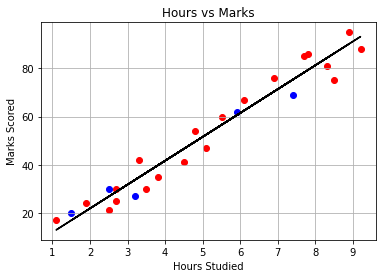

In [37]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X_train, y_train,color="red")
plt.scatter(X_test, y_test,color="blue")
plt.plot(X, line, color="black");
plt.title('Hours vs Marks')  
plt.xlabel('Hours Studied')  
plt.ylabel('Marks Scored')  
plt.grid()
plt.show()

### Making the predictions  

In [38]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [39]:
print(y_test)
print(y_pred)

[[20]
 [27]
 [69]
 [30]
 [62]]
[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [40]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': [y_test], 'Predicted': [y_pred]})  
df 

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [41]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours)+" hr.")
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25 hr.
Predicted Score = [93.69173249]


In [42]:
from tkinter import *
def alert_popup(title, message):
    """Generate a pop-up window for predictions."""
    root = Tk()
    root.title(title)
    w = 300     # popup window width
    h = 200     # popup window height
    sw = root.winfo_screenwidth()
    sh = root.winfo_screenheight()
    x = (sw - w)/2
    y = (sh - h)/2
    root.geometry('%dx%d+%d+%d' % (w, h, x, y))
    m = message
    w = Label(root, text=m, width=50, height=10)
    w.pack()
    b = Button(root, text="OK", command=root.destroy, width=10)
    b.pack()
    mainloop()

alert_popup("Predictions", own_pred[0])

In [43]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 


Mean Absolute Error: 4.183859899002975
